In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import tensorflow as tf
import keras
import librosa
from librosa import display
%matplotlib inline

In [12]:
train = pd.read_csv("/content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/yoga_82/train_keypoints_yoga82.csv")

In [13]:
train.labels.value_counts()

6    274
4    240
8    189
3    162
5    158
7    135
2    123
1    111
0    110
Name: labels, dtype: int64

In [14]:
x_train = train.drop(['file_name', 'labels'], axis=1)
y_train = train.labels

In [15]:
y_train = y_train.astype('float64')

In [16]:
y_train = keras.utils.to_categorical(y_train)

In [17]:
test = pd.read_csv("/content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/yoga_82/test_keypoints_yoga82.csv")

In [18]:
test.labels.value_counts()

6    69
4    60
8    47
5    40
3    40
7    34
2    31
0    28
1    27
Name: labels, dtype: int64

In [19]:
x_test = test.drop(['file_name', 'labels'], axis=1)
y_test = test.labels

In [20]:
y_test = test.labels.astype('float64')

In [21]:
y_test = keras.utils.to_categorical(y_test)

In [22]:
x_train = x_train.to_numpy()
x_train = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_test = x_test.to_numpy()
x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

In [23]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense,LSTM,Dropout,Activation
from sklearn import metrics
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [25]:
print(x_train.shape)
print(y_train.shape)

(1502, 1, 99)
(1502, 9)


In [26]:
model = Sequential()
model.add(LSTM(128, input_shape=(1, 99), activation='relu', return_sequences=True))
model.add(Dropout(0.25))
model.add(LSTM(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(9, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            116736    
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 256)               394240    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 9)                 5

In [27]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
checkpoint_path = "/content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/weights_yoga82.best_rnn.hdf5"
checkpoint = keras.callbacks.ModelCheckpoint(checkpoint_path,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
earlystopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=100)

In [30]:
history = model.fit(x_train, y_train, epochs=200, batch_size = 32, validation_data=(x_test, y_test), callbacks=[checkpoint, earlystopping])

Epoch 1/200
45/47 [===========================>..] - ETA: 0s - loss: 2.1357 - accuracy: 0.1694
Epoch 1: val_accuracy improved from -inf to 0.27926, saving model to /content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/weights_yoga82.best_rnn.hdf5
47/47 [==============================] - 6s 28ms/step - loss: 2.1289 - accuracy: 0.1744 - val_loss: 1.9661 - val_accuracy: 0.2793
Epoch 2/200
47/47 [==============================] - ETA: 0s - loss: 1.7196 - accuracy: 0.3149
Epoch 2: val_accuracy improved from 0.27926 to 0.34309, saving model to /content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/weights_yoga82.best_rnn.hdf5
47/47 [==============================] - 1s 20ms/step - loss: 1.7196 - accuracy: 0.3149 - val_loss: 1.4434 - val_accuracy: 0.3431
Epoch 3/200
47/47 [==============================] - ETA: 0s - loss: 1.4081 - accuracy: 0.3995
Epoch 3: val_accuracy improved from 0.34309 to 0.55585, saving model to /content/drive/MyDrive/UGP23/dataset/Yoga_82_modified/weights_yoga82.best_rn

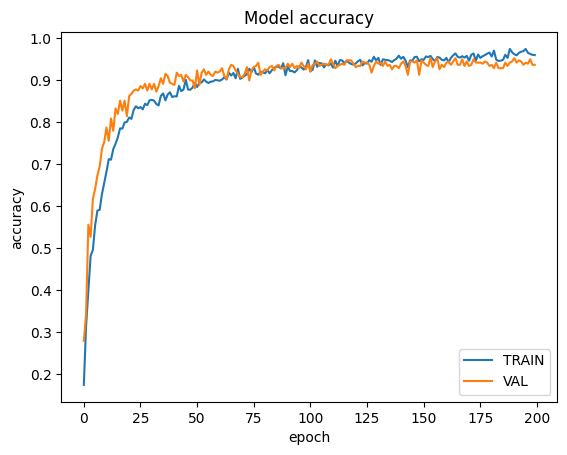

In [31]:
# Visualize the training history to see whether you're overfitting.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['TRAIN', 'VAL'], loc='lower right')
plt.show()

In [32]:
model.evaluate(x_train, y_train)

47/47 [==============================] - 0s 8ms/step - loss: 0.0462 - accuracy: 0.9854


[0.046151746064424515, 0.9853528738021851]

In [34]:
model.evaluate(x_test, y_test)

12/12 [==============================] - 0s 13ms/step - loss: 0.2557 - accuracy: 0.9362


[0.2556852102279663, 0.936170220375061]

In [35]:
y_pred = model.predict(x_test)

12/12 [==============================] - 1s 6ms/step


In [36]:
y_pred

array([[1.7759279e-05, 1.3204206e-13, 3.2152746e-18, ..., 7.3065824e-04,
        8.9729906e-18, 1.3313006e-08],
       [9.9999732e-01, 1.1712195e-12, 1.8013304e-29, ..., 2.3409667e-08,
        3.2494904e-23, 2.9829047e-13],
       [1.9141896e-14, 8.3484935e-20, 2.5981316e-25, ..., 9.9999803e-01,
        1.2917443e-25, 7.0798005e-17],
       ...,
       [1.2021932e-21, 1.5606981e-11, 9.9999994e-01, ..., 4.7976392e-09,
        1.1221510e-08, 6.7085329e-13],
       [2.5347580e-16, 9.9999923e-01, 6.0391190e-09, ..., 7.5324813e-09,
        6.5518088e-07, 1.3570567e-11],
       [2.3852214e-09, 4.6066574e-13, 1.2480411e-13, ..., 9.9992126e-01,
        2.4134923e-14, 1.8902804e-09]], dtype=float32)

In [37]:
y_pred.shape

(376, 9)

In [38]:
y_pred[0]

array([1.7759279e-05, 1.3204206e-13, 3.2152746e-18, 2.5262916e-16,
       9.9925160e-01, 2.2625644e-11, 7.3065824e-04, 8.9729906e-18,
       1.3313006e-08], dtype=float32)

In [39]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([4, 0, 6, 0, 5, 4, 3, 6, 6, 3, 5, 6, 1, 3, 8, 0, 3, 3, 5, 6, 7, 6,
       2, 0, 6, 6, 4, 6, 2, 6, 6, 6, 6, 8, 4, 4, 3, 0, 6, 4, 6, 6, 4, 6,
       4, 0, 4, 2, 4, 2, 8, 2, 8, 6, 0, 1, 7, 6, 6, 6, 7, 8, 4, 4, 6, 3,
       5, 3, 0, 0, 7, 2, 6, 4, 3, 3, 3, 8, 2, 7, 8, 7, 2, 1, 8, 3, 2, 7,
       8, 6, 7, 5, 8, 4, 1, 7, 6, 5, 0, 5, 6, 4, 5, 0, 0, 4, 0, 8, 1, 6,
       6, 4, 6, 6, 4, 1, 8, 6, 5, 8, 2, 3, 2, 3, 6, 6, 7, 6, 1, 4, 6, 6,
       7, 1, 8, 8, 4, 2, 6, 7, 5, 6, 0, 8, 2, 2, 3, 0, 5, 8, 4, 5, 5, 8,
       8, 4, 8, 8, 6, 0, 0, 1, 2, 7, 0, 7, 8, 5, 7, 6, 0, 7, 8, 6, 4, 4,
       5, 7, 2, 6, 8, 2, 4, 5, 8, 4, 6, 0, 5, 4, 7, 6, 4, 5, 6, 8, 8, 6,
       6, 6, 3, 7, 7, 4, 3, 6, 8, 2, 6, 4, 0, 6, 2, 2, 8, 8, 8, 7, 0, 4,
       0, 8, 6, 6, 1, 6, 5, 5, 1, 0, 4, 0, 6, 0, 5, 5, 5, 2, 3, 6, 2, 8,
       8, 2, 8, 1, 2, 6, 3, 3, 2, 7, 6, 8, 3, 7, 8, 1, 6, 3, 0, 8, 2, 5,
       1, 2, 3, 4, 8, 8, 8, 5, 7, 0, 7, 6, 6, 8, 3, 7, 2, 4, 4, 7, 8, 6,
       4, 8, 1, 6, 6, 5, 2, 1, 6, 6, 3, 6, 1, 1, 0,

In [40]:
pose_test = [None] * y_test.size
pose_pred = [None] * y_pred.size

for i in range(len(y_test)):
    if(y_test[i]==0): pose_test[i] = 'Plank'           
    if(y_test[i]==1): pose_test[i] = 'Warrior_I'       
    if(y_test[i]==2): pose_test[i] = 'Standing_big_toe'     
    if(y_test[i]==3): pose_test[i] = 'Warrior_II'         
    if(y_test[i]==4): pose_test[i] = 'Cat_Cow'         
    if(y_test[i]==5): pose_test[i] = 'Child'            
    if(y_test[i]==6): pose_test[i] = 'Cobra'     
    if(y_test[i]==7): pose_test[i] = 'Tree'              
    if(y_test[i]==8): pose_test[i] = 'Downward-Facing_Dog'


for i in range(len(y_pred)):
    if(y_pred[i]==0): pose_pred[i] = 'Plank'                           
    if(y_pred[i]==1): pose_pred[i] = 'Warrior_I'                   
    if(y_pred[i]==2): pose_pred[i] = 'Standing_big_toe'     
    if(y_pred[i]==3): pose_pred[i] = 'Warrior_II'                      
    if(y_pred[i]==4): pose_pred[i] = 'Cat_Cow'                                              
    if(y_pred[i]==5): pose_pred[i] = 'Child'                                 
    if(y_pred[i]==6): pose_pred[i] = 'Cobra'                              
    if(y_pred[i]==7): pose_pred[i] = 'Tree'                                    
    if(y_pred[i]==8): pose_pred[i] = 'Downward-Facing_Dog'     

In [41]:
confusion_matrix(pose_test, pose_pred)

array([[51,  0,  3,  3,  3,  0,  0,  0,  0],
       [ 0, 37,  2,  1,  0,  0,  0,  0,  0],
       [ 0,  0, 67,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  1, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  1, 31,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  0, 26,  0],
       [ 0,  0,  1,  0,  0,  1,  1,  1, 36]])

In [42]:
! pip install -q scikit-plot

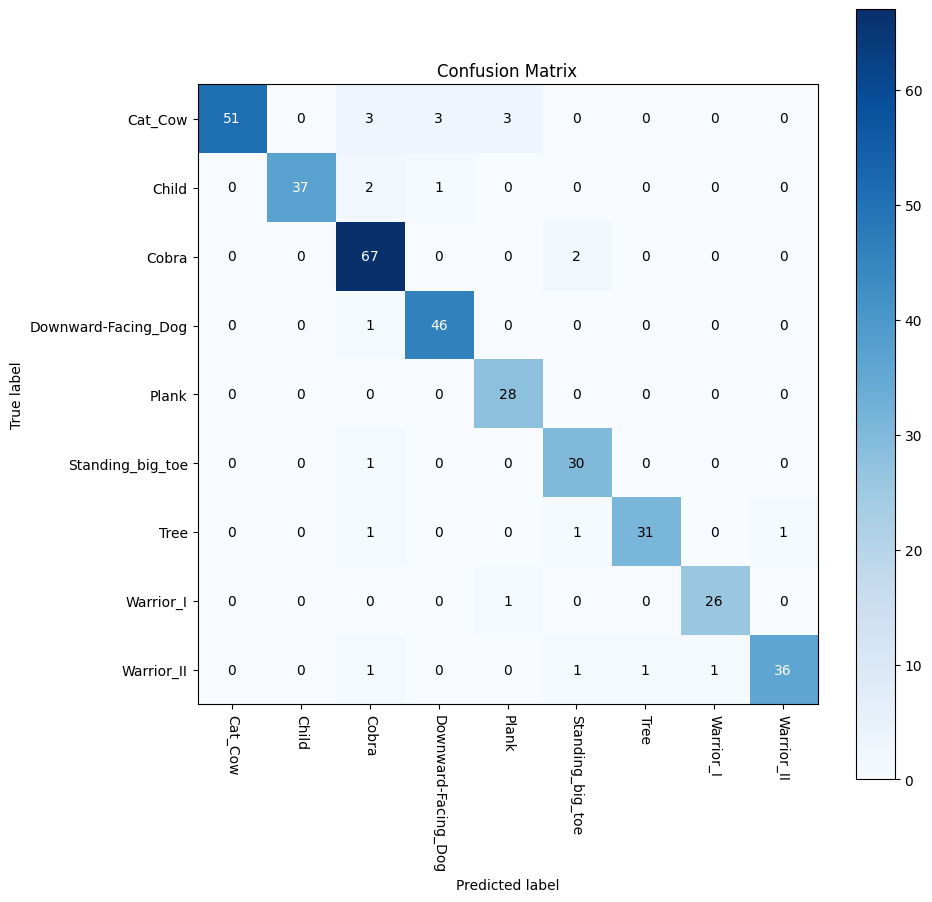

In [44]:
import matplotlib.pyplot as plt
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(pose_test, pose_pred, figsize=(10,10))

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=270)
plt.show()